<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_ex_combine_reshape_yahoo_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Combinação, Reshape e outras transformações dos dados

Referências e Materiais úteis para este Lab:

- [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Pandas_I.ipynb)
- [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Pandas Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html)
---



In [ ]:
import numpy as np
import pandas as pd

path = 'https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/'

# **CASE: Yahoo Finance**

Nos exercícios a seguir partimos da seguinte base de dados extraída do `yahoo finance`:

<small>
Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/lookup

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'BRL=X', 'BTC-USD'],'2019-01-01','2023-03-01')
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                               Close  \
               BRL=X      BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP   BRL=X   
Date                                                                       
2019-01-01    3.8800  3843.520020        NaN        NaN      NaN  3.8800   
2019-01-02    3.8799  3943.409424  31.761528  11.060242  91012.0  3.8799   
2019-01-03    3.7863  3836.741211  32.285160  11.331462  91564.0  3.7863   
2019-01-04    3.7551  3857.717529  31.744339  11.363641  91841.0  3.7551   
2019-01-05       NaN  3845.194580        NaN        NaN      NaN     NaN   

                                                        ...    Open  \
                BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP  ...   BRL=X   
Date                                                    ...           
2019-01-01  3843.520020        NaN        NaN      NaN  ...  3.8800   
2019-01-02  3943.409424  37.000000  24.059999  91012.0  ...  3.8799   
2019-01-03  3836.741211  37.610001  24.650000  91564.0  ...  3.7866   
2019-01-04  3857.717529  36.980000  24.719999  91841.0  ...  3.7550   
2019-01-05  3845.194580        NaN        NaN      NaN  ...     NaN   

                                                       Volume              \
                BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP  BRL=X     BTC-USD   
Date                                                                        
2019-01-01  3746.713379        NaN        NaN      NaN    0.0  4324200990   
2019-01-02  3849.216309  35.439999  22.549999  87887.0    0.0  5244856836   
2019-01-03  3931.048584  36.750000  23.959999  91011.0    0.0  4530215219   
2019-01-04  3832.040039  37.220001  24.850000  91577.0    0.0  4847965467   
2019-01-05  3851.973877        NaN        NaN      NaN    NaN  5137609824   

                                                
              ITUB4.SA     PETR4.SA      ^BVSP  
Date                                            
2019-01-01         NaN          NaN        NaN  
2019-01-02  25581700.0  104534800.0  5615400.0  
2019-01-03  21938600.0   95206400.0  6066200.0  
2019-01-04  24873500.0   72119800.0  5322100.0  
2019-01-05         NaN          NaN        NaN  

[5 rows x 30 columns]

## Q1. `pd.concat()`. 

Selecione o valor de fechamento ajustado de cada ticket produzindo um DataFrame `df` com o seguinte aspecto: 


In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q1.csv').head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761532,11.060242,91012.0
2,2019-01-03,3.7863,3836.741211,32.285156,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744347,11.363639,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN


As colunas acima são compostas. Veja um exemplo para extrair a cotação do Dólar em Reais. 

In [ ]:
data[('Adj Close', 'BRL=X')]

Date
2019-01-01    3.8800
2019-01-02    3.8799
2019-01-03    3.7863
2019-01-04    3.7551
2019-01-05       NaN
               ...  
2023-02-24    5.1362
2023-02-25       NaN
2023-02-26       NaN
2023-02-27    5.2078
2023-02-28    5.1997
Freq: D, Name: (Adj Close, BRL=X), Length: 1520, dtype: float64

In [ ]:
df = pd.concat([ data[('Adj Close', 'BRL=X')] , 
           data[('Adj Close', 'BTC-USD')],
           data[('Adj Close', 'ITUB4.SA')],
           data[('Adj Close', 'PETR4.SA')],
           data[('Adj Close', '^BVSP')]
           ], axis=1 )

df.head()

Adj Close                                            
               BRL=X      BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP
Date                                                            
2019-01-01    3.8800  3843.520020        NaN        NaN      NaN
2019-01-02    3.8799  3943.409424  31.761528  11.060242  91012.0
2019-01-03    3.7863  3836.741211  32.285160  11.331462  91564.0
2019-01-04    3.7551  3857.717529  31.744339  11.363641  91841.0
2019-01-05       NaN  3845.194580        NaN        NaN      NaN

In [ ]:
df = df.reset_index()

df.head()

Date Adj Close                                            
                 BRL=X      BTC-USD   ITUB4.SA   PETR4.SA    ^BVSP
0 2019-01-01    3.8800  3843.520020        NaN        NaN      NaN
1 2019-01-02    3.8799  3943.409424  31.761528  11.060242  91012.0
2 2019-01-03    3.7863  3836.741211  32.285160  11.331462  91564.0
3 2019-01-04    3.7551  3857.717529  31.744339  11.363641  91841.0
4 2019-01-05       NaN  3845.194580        NaN        NaN      NaN

In [ ]:
df.columns = ['Date', 'BRL=X',	'BTC-USD',	'ITUB4.SA',	'PETR4.SA',	'^BVSP']
df.head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761528,11.060242,91012.0
2,2019-01-03,3.7863,3836.741211,32.285160,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744339,11.363641,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN


Está feito. Note que poderíamos obter o mesmo resultado de forma direta sem empregar o `pd.concat()`:

In [ ]:
data['Adj Close'].reset_index().head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,31.761528,11.060242,91012.0
2,2019-01-03,3.7863,3836.741211,32.285160,11.331462,91564.0
3,2019-01-04,3.7551,3857.717529,31.744339,11.363641,91841.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN


e, de fato, existe muitas outras maneiras de se fazer isso. Mas entender o `pd.concat()` é o objetivo aqui, e você não poderia se valer dessa alternativa direta se os valores misturassem, por exemplo, colunas de `Adj Close` e `Open`. 

In [ ]:
#@markdown Must be `True`
len(df) == 1520

True

(Moodle) Qual a soma de todos os valores do dataframe (exceto o campo de datas)? 

In [ ]:
print(df.drop(columns='Date').sum().sum())

145801021.60794258


## Q2. `df.loc`. 

Crie para o ticket `BTC-USD` um DataFrame `df_day_gain` como abaixo com a informação de `day_gain`, onde `True` significa um valor maior do ativo no dia seguinte. 

In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q2.csv').head()

,Date,day_gain
0,2019-01-02,True
1,2019-01-03,False
2,2019-01-04,True
3,2019-01-05,False
4,2019-01-06,True


In [ ]:
ticket = 'BTC-USD'

day_gain = []
for i in range(1,len(df)):
  day_gain.append( (df.loc[i,ticket] - df.loc[i-1,ticket]) > 0 )

df_day_gain = pd.DataFrame()
df_day_gain['Date'] = df.loc[1::,'Date']
df_day_gain['day_gain'] = day_gain

df_day_gain.head()

# df_day_gain.head().to_csv('lab_yahoo_q2.csv',index=None)



,Date,day_gain
1,2019-01-02,True
2,2019-01-03,False
3,2019-01-04,True
4,2019-01-05,False
5,2019-01-06,True


In [ ]:
#@markdown Must be `True`
len(df_day_gain) == 1519  

True

(Moodle) Qual a quantidade de `day_gain`(s) `True` e `False` encontradas para o ativo  `BTC-US`? 

In [ ]:
df_day_gain.day_gain.value_counts()

True     784
False    735
Name: day_gain, dtype: int64

## Q3. `df.melt()`


<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png" width=800, align="right">



Empregue o método `melt()` do `Pandas` para transformar o DataFrame `df` com abaixo.

Dica: use `pd.to_datetime(df.Date).dt.day_name()` para gerar o nome dos dias da semana.

In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q3.csv').head()

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday
3,2019-01-04,BRL=X,3.7551,Friday
4,2019-01-05,BRL=X,NaN,Saturday


In [ ]:
df = df.melt(id_vars='Date', value_vars=['BRL=X', 'ITUB4.SA', 'PETR4.SA', '^BVSP', 'BTC-USD'], var_name='Ticket', value_name='Adj Close' )
df.head()


,Date,Ticket,Adj Close
0,2019-01-01,BRL=X,3.8800
1,2019-01-02,BRL=X,3.8799
2,2019-01-03,BRL=X,3.7863
3,2019-01-04,BRL=X,3.7551
4,2019-01-05,BRL=X,NaN


In [ ]:
from datetime import datetime

df['day_of_week'] = pd.to_datetime(df.Date).dt.day_name()
df.head()

# df.head().to_csv('lab_yahoo_q3.csv',index=None)

,Date,Ticket,Adj Close,day_of_week
0,2019-01-01,BRL=X,3.8800,Tuesday
1,2019-01-02,BRL=X,3.8799,Wednesday
2,2019-01-03,BRL=X,3.7863,Thursday
3,2019-01-04,BRL=X,3.7551,Friday
4,2019-01-05,BRL=X,NaN,Saturday


In [ ]:
#@markdown Must be True
len(df[ df.day_of_week == 'Tuesday' ]) == 1090

True

(Moodle) Qual o maior valor do Real às sextas-feiras (`Friday`) dentro do perído e em que data isso ocorreu? (Atenção, a base contém cotações do dólar).

In [ ]:
df[ (df.day_of_week == 'Friday') & (df.Ticket == 'BRL=X') ].nsmallest(1,'Adj Close')

,Date,Ticket,Adj Close,day_of_week
31,2019-02-01,BRL=X,3.6428,Friday


## Q4. `df.pivot()`

<img src="https://pandas.pydata.org/docs/_images/reshaping_pivot.png" width=800, align="right">

Crie um DataFrame `df_Friday`, para ter o seguinte formato, somente com os valores de fechamento da semana (`Friday`) dos ativos.

Dica: 
1. Selecione somente os dias desajados
2. Aplique o `df.pivot()`
3. Faça o `reset_index()`

In [ ]:
#@markdown
pd.read_csv(path + 'lab_yahoo_q4.csv').head()

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,3.7551,3857.717529,31.744371,11.363641,91841.0
1,2019-01-11,3.7079,3687.365479,32.276577,11.487758,93658.0
2,2019-01-18,3.7489,3657.839355,32.328098,11.676232,96097.0
3,2019-01-25,3.7698,3599.765869,NaN,NaN,NaN
4,2019-02-01,3.6428,3487.945312,33.328152,11.860109,97861.0


In [ ]:
df_Friday = df[ df.day_of_week == 'Friday' ]
df_Friday = df_Friday.pivot(index='Date', columns='Ticket', values='Adj Close')
df_Friday = df_Friday.reset_index()
df_Friday.columns.name = ''
df_Friday.head()

# df_Friday.head().to_csv('lab_yahoo_q4.csv',index=None)



,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,3.7551,3857.717529,31.744339,11.363641,91841.0
1,2019-01-11,3.7079,3687.365479,32.276592,11.487757,93658.0
2,2019-01-18,3.7489,3657.839355,32.328079,11.676232,96097.0
3,2019-01-25,3.7698,3599.765869,NaN,NaN,NaN
4,2019-02-01,3.6428,3487.945312,33.328152,11.860110,97861.0


In [ ]:
#@markdown Must be True
int(df_Friday['BRL=X'].sum()) == 1067

True

(Moodle) Qual a média da cotação do dólar nas últimas 4 sextas-feiras da base? 

In [ ]:
df_Friday.iloc[-4::] 

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
213,2023-02-03,5.0492,23449.322266,25.102566,24.790001,108490.0
214,2023-02-10,5.2895,21651.183594,25.782093,26.719999,108150.0
215,2023-02-17,5.2168,24565.601562,26.861343,26.440001,109303.0
216,2023-02-24,5.1362,23198.126953,25.652184,25.900000,105873.0


In [ ]:
df_Friday.iloc[-4::]['BRL=X'].mean()

5.172925114631653

## Q5. Transformações dos dados.

Converta os valores *cabíveis* do DataFrame anterior para reais e, em seguida, normalize o valores de cada `Ticket`.

(nota: por simplicidade, estamos considerando que o Yahoo forneceu todos os valores em dólar e, portanto, basta multiplicar os valores pela taxa do Real em cada dia. Isso, entretanto, não é verdade pois para ativos da bolsa brasileira os ativos já vem em Real e os da bolsa americana em dólar. Mas isso não afeta o princípio do exercício que continua válido.)

Dica: norma `minmax`, divida pelo máximo de cada `Ticket`. 



In [ ]:
df_Friday.columns

Index(['Date', 'BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP'], dtype='object', name='')

In [ ]:
for c in ['BTC-USD', 'ITUB4.SA', 'PETR4.SA']:
  df_Friday[c] = df_Friday[c] * df_Friday['BRL=X']

for c in ['BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP']:
  df_Friday[c] = df_Friday[c] / df_Friday[c].max()

In [ ]:
df_Friday.head()

# df_Friday.head().to_csv('lab_yahoo_q5.csv',index=None)

,Date,BRL=X,BTC-USD,ITUB4.SA,PETR4.SA,^BVSP
0,2019-01-04,0.644241,0.041239,0.725369,0.247855,0.705785
1,2019-01-11,0.636143,0.038923,0.728261,0.247413,0.719749
2,2019-01-18,0.643177,0.039038,0.737488,0.254253,0.738492
3,2019-01-25,0.646763,0.038632,NaN,NaN,NaN
4,2019-02-01,0.624974,0.036171,0.738785,0.250947,0.752048


In [ ]:
#@markdown Must be True
all(df_Friday.max()[1::] == [1,1,1,1,1])

True

Execute o gráfico a seguir. Seu DataFrame deve se chamar `df_Friday`.

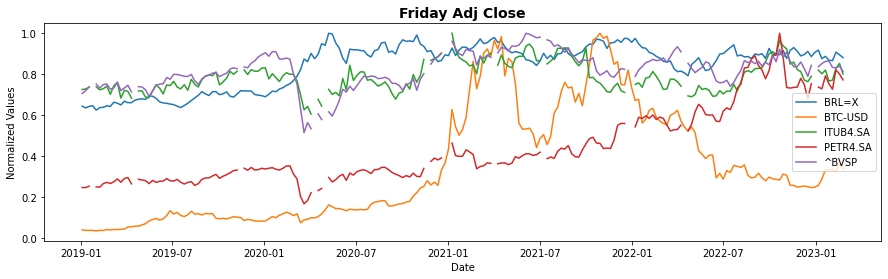

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,4))

df_Friday = df_Friday.set_index('Date')

for c in ['BRL=X', 'BTC-USD', 'ITUB4.SA', 'PETR4.SA', '^BVSP']:
  plt.plot(df_Friday[c], label=c)

plt.title('Friday Adj Close', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()

plt.show()

(Moodle) Com base no gráfico produzido, qual ativo apresentou crescimento mais consistente no período? 

Resp: PETR4